<header style="padding: 4em 0 0em 0">
    <img src="http://brentyi.github.io/filestore/ai4all_logo.svg" style="width: 30em; height: auto; margin: 0;" />
    <h3 style="margin: 1em 0 0 0;">
        <strong>Machine Learning with Scikit-learn</strong>
        <span style="color: #777">
        &nbsp;&blacksquare;&nbsp;
        Robotics, Summer 2020</span>
    </h3>
</header>

<hr style="border-top: 0.4em solid #eee;" />

In this notebook, we'll run through a standard workflow for running machine learning experiments using a popular Python package called `scikit-learn`.

<hr style="border-top: 0.4em solid #eee;" />

## 1. Dataset Loading

First up, let's do some imports:

In [1]:
from ml_helpers import load_dataset
import matplotlib.pyplot as plt
import numpy as np

Then, we're ready load up the training images + labels for our aerial imagery dataset!

We've also provided a helper function to visualize some samples + labels -- you should see that some of the images are marked as "safe". These are scenes that depict areas that are mostly free from buildings, vegetation, cars, etc, where it would be safe for a drone to drop off a package.

In [2]:
# Load dataset
# > We recommend taking a look at `ml_helpers.py` to see how this is implemented!
images_all, labels_all = load_dataset()

Reading dataset/dataset.yaml... done!
Loading images.................... done!
Loaded 6888 images in 23.563263177871704 seconds!


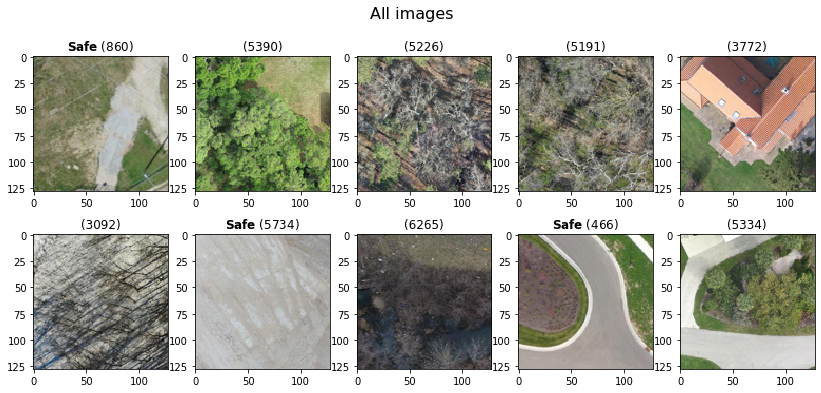

In [3]:
def visualize_labels(title, images, labels, seed=42):
    """Visualize a few images from our dataset!
    
    Args:
        title (str): Title of figure.
        images (np.ndarray): An array containing images. Shape should be (N, 64, 64, 3).
        labels (np.ndarray): An array of labels, 0 or 1. Shape should be (N, )
        seed (int): Seed used to generate random samples. Change this to see different samples!
    """
    # Validate inputs
    assert len(images.shape) == 4
    assert len(labels.shape) == 1
    assert labels.shape[0] == images.shape[0]
    assert images.shape[-1] == 3

    generator = np.random.RandomState(seed)
    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    for ax in axes.flatten():
        index = generator.randint(len(images))
        ax.imshow(images[index])
        if labels[index] == 1:
            ax.set_title(f"$\\bf{{Safe}}$ ({index})")
        else:
            ax.set_title(f"({index})")
    fig.suptitle(title, fontsize=16)


# Visualize some labels
visualize_labels("All images", images_all, labels_all)

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Data Loading &amp; Visualization</div>

`images_all` and `labels_all` are both NumPy arrays: what are the shapes? What do the dimensions in each shape correspond to?

> *Your response here!*

## 2. Feature Extraction

Before we do any classification, we need to extract a 1D feature from our image.

We've implemented one such naive feature extractor below!

In [4]:
def extract_features(images):
    features = []
    for image in images:
        # Image shape should be (rows, cols, 3)
        rows, cols, channels = image.shape
        assert channels == 3

        # Get feature: average along row and column axes
        f = np.mean(image, axis=(0, 1))
        assert f.shape == (3,)
        features.append(f)
    return np.array(features)


features_all = extract_features(images_all)

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Feature Extraction</div>

What is this feature extraction function doing? What's the shape of `features_all`?

> *Your response here!*


## 3. Train/Validation Split

Now that we've extracted our features from our images, we can split our entire dataset into a train set and a validation set. We'll fit our model to the former and then evaluate the performance of it using the latter.

In [5]:
import sklearn.model_selection

# Get train / validation sets
(
    images_train,
    images_validation,
    features_train,
    features_validation,
    labels_train,
    labels_validation,
) = sklearn.model_selection.train_test_split(
    images_all,
    features_all,
    labels_all,
    train_size=0.75,
    random_state=42,
    shuffle=True,
)

# Print shapes of train + validation features and labels
print("Train images shape:\t", images_train.shape)
print("Train features shape:\t", features_train.shape)
print("Train labels shape:\t", labels_train.shape)
print()
print("Validation images shape:\t", images_validation.shape)
print("Validation features shape:\t", features_validation.shape)
print("Validation labels shape:\t", labels_validation.shape)

Train images shape:	 (5166, 128, 128, 3)
Train features shape:	 (5166, 3)
Train labels shape:	 (5166,)

Validation images shape:	 (1722, 128, 128, 3)
Validation features shape:	 (1722, 3)
Validation labels shape:	 (1722,)


<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Train/Validation Split</div>

How many training samples do we have? Validation samples?

> *Your response here!*

## 4. Creating & fitting a classifier

Next, we can create a classifier! We'll use a k-nearest neighbors classifier below, but there are [many more](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) you can try later.

After creating the classifier, we pass in training examples using the `.fit()` function.

<span style="color: #777">*Methods refer to functions that belong to objects in Python; for example when we call .append() on a list</span><br />

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Creating &amp; fitting a classifier</div>

Look up the documentation for `sklearn.neighbors.KNeighborsClassifier()`. Create one of these classifiers and assign it to the `classifier` variable, then call `classifier.fit()` on `features_train` and `labels-train`.

In [6]:
import sklearn.neighbors

classifier = None

# ~~START DELETE~~
classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
classifier.fit(features_train, labels_train)
# ~~END DELETE~~

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

##  5. Predictions

To run predictions with our classifier, we can call the `.predict()` function on a set of input features.
This will come out as a NumPy array, with one value per input feature.

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Predictions</div>

Use `classifier.predict()` to predict a set of labels from `features_validation`, then assign it to `labels_validation_predicted`.

In [7]:
# fmt: off
labels_validation_predicted = classifier.predict(features_validation) # ~~DELETE RHS~~
# fmt: on

We can also visualize some of the outputs, and compare them to what the true ones are!

Let's call our `visualize_labels()` function from earlier:

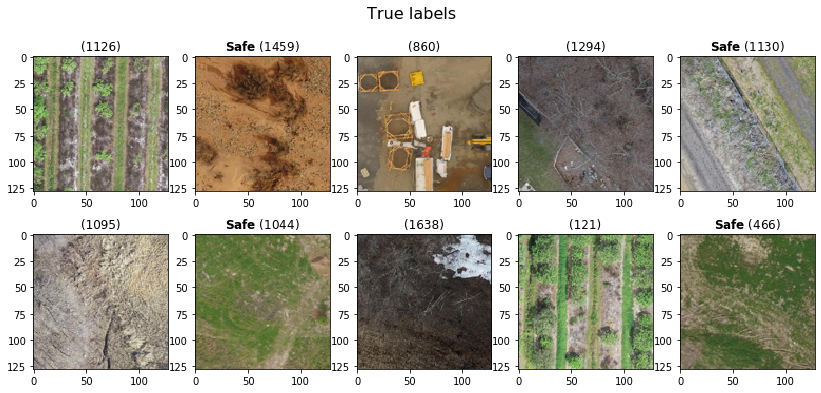

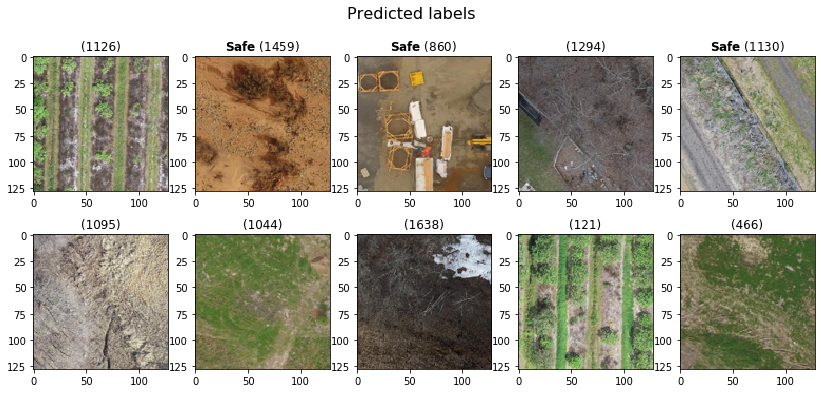

In [8]:
visualize_labels("True labels", images_validation, labels_validation)
visualize_labels(
    "Predicted labels", images_validation, labels_validation_predicted
)

## 6. Evaluation

To evaluate our model, one thing we can do is naively check its accuracy percentage:

(note that we're doing an **element-wise** equality comparison here -- more NumPy magic!)

In [9]:
accuracy = np.mean(labels_validation_predicted == labels_validation)
print(f"Accuracy: {accuracy}%")

Accuracy: 0.6747967479674797%


<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Evaluation</div>

You can also generate "classification reports" directly using some helpers defined in `scikit-learn`.
These contain helpful information about general accuracy, precision, and recall.

Look up the documentation for `sklearn.metrics.classification_report()`, then create one and assign it to `report`.

You'll want to pass in `labels_validation` and `labels_validation_predicted`.

**Question:** what do the precision/recall values mean? (fyi: no expectation to memorize these definitions, just be aware they exist)

> *Your response here!*

In [10]:
import sklearn.metrics

# fmt: off
report = sklearn.metrics.classification_report(y_true=labels_validation, y_pred=labels_validation_predicted) # ~~DELETE RHS~~
# fmt: on

print("Classification report for", classifier)
print("===============================")
print("===============================")
print(report)

Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       898
           1       0.66      0.65      0.66       824

    accuracy                           0.67      1722
   macro avg       0.67      0.67      0.67      1722
weighted avg       0.67      0.67      0.67      1722



## 7. Confusion Matrices

Last but not least, we can use `scikit-learn` to generate confusion matrices for us!

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Confusion Matrices</div>

Look up the documentation for `sklearn.metrics.plot_confusion_matrix()`, then call it in the cell below.

You'll want to pass in `classifier`, `features_validation`, and `labels_validation`.

What do numbers in each cell of the confusion matrix mean?
> *Your response here!*

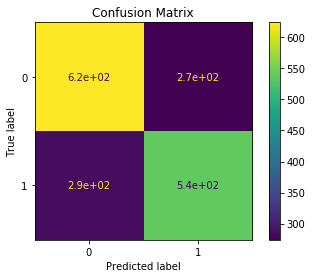

In [11]:
# ~~START DELETE~~
sklearn.metrics.plot_confusion_matrix(
    estimator=classifier, X=features_validation, y_true=labels_validation
)
# ~~END DELETE~~
plt.title("Confusion Matrix")
plt.show()